## BBM409 ASSIGNMENT 1

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data [1]. Maximum Likelihood Estimation requires that the data are sampled from a multivariate normal distribution [2]. 

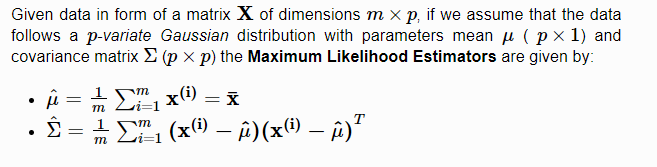

This assignment consists of 3 steps explained below.

Note: Don't forget to add comments in your codes.

[1]: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.

[2]: https://online.stat.psu.edu/stat505/lesson/12/12.7

**Step 1 :** You are provided two CSV files that contains samples derived from two bivariate Gaussian distributions separately; Class1.csv corresponds to $w_{1}$ class distribution, Class2.csv to $w_{2}$.  Estimate the parameters of these distributions using the max-likelihood estimates (given above) on the given data samples for both classes. (10 points) 

Write your codes in the cells shared below.

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import svm

#variables is assigned here
temp_mean_x1, temp_mean_x2 = 0,0
# optimal center location vectors and covariance matrices are stored in these lists
estimated_parameters_1, estimated_parameters_2 = [], []

# this functions finds the optimal center of bivariate gaussian model 
def Estimate_Mean(data):
    
    global temp_mean_x1, temp_mean_x2
    
    num_of_data = len(data)
    x1_counter, x2_counter = 0, 0
    
    for i in range(num_of_data):
        x1_counter += data[i][0]
        x2_counter += data[i][1]
    
    temp_mean_x1 = x1_counter / num_of_data
    temp_mean_x2 = x2_counter / num_of_data
    
    
# this functions finds the optimal covariance matrix of bivariate gaussian model
def Estimate_Covariance(data, center_loc):
    
    num_of_data = len(data)
    sum = np.zeros([2,2])
    
    for sample in data:
        
        sample = sample - center_loc
        
        #converting 1D to 2D
        sample = sample.reshape((1, sample.shape[0]))
        
        #taking transpose of that sample
        T_sample = sample.transpose()
        
        #finally dot product happens and result is stored in sum variable
        res = T_sample @ sample
        sum = sum + res
        
    return sum / num_of_data


# this functions is for the clarity, simply it calls the other 2 functions
def Estimate_Parameters(data, estimated_values):
    Estimate_Mean(data)
    center_loc = np.array([temp_mean_x1, temp_mean_x2])
    covariance = Estimate_Covariance(data, center_loc)
    
    estimated_values.append(center_loc)
    estimated_values.append(covariance)
    
# this function plots the data
def Plot_Data(class_data):
    data_x = class_data.values[:1, 1:]
    data_y = class_data.values[1:, 1:]
    plt.scatter(data_x, data_y, s=15)



#read the data from the csv files
raw_data_class1 = open("Class1.csv", "r")
class1_data = read_csv(raw_data_class1)
data_1 = class1_data.values.transpose()[1:,:]
# --- 
raw_data_class2 = open("Class2.csv", "r")
class2_data = read_csv(raw_data_class2)
data_2 = class2_data.values.transpose()[1:,:]



# estimate the parameters of the distributions using the max-likelihood estimates
Estimate_Parameters(data_1, estimated_parameters_1)
Estimate_Parameters(data_2, estimated_parameters_2)


# print operations are here
print("Center of the bivariate normal distribution for classes")
print("class 1 : " + str(estimated_parameters_1[0]))
print("class 2 : " + str(estimated_parameters_2[0]))
# ---
print("\nCovariance matrix for classes")
print("class 1:")
print(estimated_parameters_1[1])
print("class 2:")
print(estimated_parameters_2[1], end="\n\n")

Center of the bivariate normal distribution for classes
class 1 : [-1.60184933 -1.74017087]
class 2 : [5.03279004 3.00261806]

Covariance matrix for classes
class 1:
[[ 1.57171937 -0.52997235]
 [-0.52997235  2.99853667]]
class 2:
[[1.62784462 0.51664892]
 [0.51664892 0.76483477]]



**Step 2 :** Write a program to find the decision boundaries between the two distributions for $w_{1}$ and $w_{2}$; and plot them. (50 points)

Please explain briefly, why the decision boundary is in the form that you obtained? 

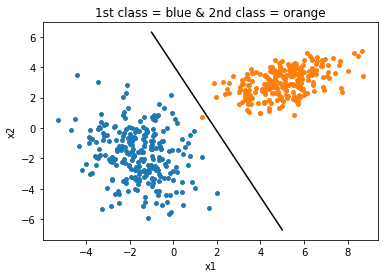

In [2]:
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB


# plot the data
Plot_Data(class1_data)
Plot_Data(class2_data)
plt.title("1st class = blue & 2nd class = orange")
plt.xlabel("x1")
plt.ylabel("x2")

#Linear boundary
X = np.concatenate((data_1, data_2), axis = 0)
Y = np.array([0]*len(data_1) + [1]*len(data_2))


clf = svm.SVC(kernel = 'linear',  gamma=0.7)
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k')


We obtain this result because of the distributions of the train data samples. As you can see from the plot above, the first class's samples are so distracted than the second class's samples. Simply, my code determines the density points of the samples and then predicts the boundary line. You may realize that a sample from the second class stays on the left side of the line. This sample belongs to the second class but it stays in the first class's area. If we test some data and this kind of sample comes out, then it will be predicted as a first-class element.

**Step 3 :** You are provided a set of test samples in another CSV file. For each sample in that file, assign the given test samples to the appropriate classes according to the Bayesian Minimum Error-Rate principle. (40 points)

Provide the classification results in tabular form; each row contains the data in the form: ($x_{i_1}$, $x_{i_2}$, $w_{i}$), where $x_{i_1}$ and $x_{i_2}$ represents the value of the first and the second features, respectively; $w_{i}$ represents the assigned class index, i.e. 1 or 2. 

Plot your classification result. Make sure that all samples are depicted in one plot embedded on the computed 
densities with a distinguished color.

Use following prior probabilities: 

Case 1: P($w_{1}$) = P($w_{2}$) = 0.5

Case 2: P($w_{1}$) = 0.8, P($w_{2}$) = 0.2


In [12]:
from sklearn.naive_bayes import GaussianNB
from numpy import vstack

# read the test data
raw_test_data = open("test.csv", "r")
test_data_temp = read_csv(raw_test_data)
test_data = test_data_temp.to_numpy().transpose()[1:,:]
     

#this function decides which class should the test data be assigned
def DecisionFunction(prior_prob_1, prior_prob_2):
    
    # this function will be used below to decide which class each sample belongs
    gausNB = GaussianNB(priors=[prior_prob_1, prior_prob_2])
    X = vstack((data_1, data_2))
    y = [1 for x in range(len(data_1))] + [2 for x in range(len(data_2))]
    
    # feed with data here
    gausNB.fit(X, y)
    return_list = []
    for i in range(len(test_data)):
        s = test_data[i]
        sample = test_data[i]
    
        #temp stores the one sample as a x1, x2 and w respectively
        #and finally, return_list stores all of them
        temp = []
        temp.append(sample[0])
        temp.append(sample[1])
        
        sample = sample.reshape(1, test_data[i].shape[0])
        
        if gausNB.predict(sample)[0] == 1:
            temp.append(1)
        else:
            temp.append(2)
        
        return_list.append(temp)
        
    return return_list


# this function plots the data
def Print_Plot_v2(out):
    class_1_x, class_1_y, class_2_x, class_2_y = [],[],[],[]
    data = out.values
    for i in data:
        if i[2] == 1:
            class_1_x.append(i[0])
            class_1_y.append(i[1])
        else:
            class_2_x.append(i[0])
            class_2_y.append(i[1])
    plt.scatter(class_1_x, class_1_y, s=15)
    plt.scatter(class_2_x, class_2_y, s=15)
    plt.title("1st class = blue & 2nd class = orange")
    plt.xlabel("x1")
    plt.ylabel("x2")
            

# this function displays the data as a plot and tabular form
def Display_Case_Result(prior_prob_1, prior_prob_2):
    out = DecisionFunction(prior_prob_1, prior_prob_2)
    out = pd.DataFrame(out, columns=["x1", "x2", "w"])
    Print_Plot_v2(out)
    print(out)

# to display all rows
pd.set_option('display.max_rows', None)

--------- CASE 1 ---------

           x1        x2  w
0   -1.977628  0.910796  1
1   -2.421549 -0.684136  1
2   -2.400030 -0.920663  1
3    2.807817 -3.396010  1
4   -2.937310 -1.141246  1
5   -1.506070 -1.710188  1
6   -1.321899 -2.105649  1
7    1.134877 -2.981363  1
8   -5.279608 -1.693543  1
9   -3.421795 -2.486451  1
10   0.275616 -1.579199  1
11  -2.564243 -0.797473  1
12  -3.567021 -2.452663  1
13  -2.717887 -6.487430  1
14  -0.087543 -5.361168  1
15   0.708270 -2.066777  1
16  -2.503138  0.522787  1
17  -0.461453 -1.982902  1
18  -1.221858 -3.091007  1
19  -2.113305 -2.175885  1
20  -0.436664 -3.946896  1
21   0.733372 -1.060687  1
22  -0.078063 -1.812192  1
23  -1.876739  0.384627  1
24  -2.373753 -2.332709  1
25  -1.054731 -2.428538  1
26  -2.506939 -2.371006  1
27   1.473290 -3.421892  1
28  -1.658650  1.065023  1
29  -1.596408 -1.492552  1
30   0.148071 -1.299947  1
31  -3.075137 -1.559954  1
32  -1.209439  0.285467  1
33  -1.666634 -0.533612  1
34  -0.769239 -4.600630  1


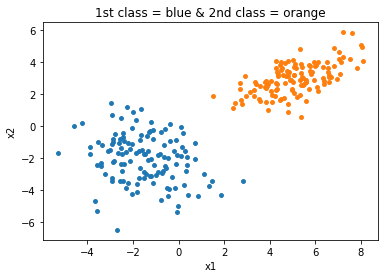

In [13]:
print("--------- CASE 1 ---------\n")
Display_Case_Result(0.5, 0.5)

--------- CASE 2 ---------

           x1        x2  w
0   -1.977628  0.910796  1
1   -2.421549 -0.684136  1
2   -2.400030 -0.920663  1
3    2.807817 -3.396010  1
4   -2.937310 -1.141246  1
5   -1.506070 -1.710188  1
6   -1.321899 -2.105649  1
7    1.134877 -2.981363  1
8   -5.279608 -1.693543  1
9   -3.421795 -2.486451  1
10   0.275616 -1.579199  1
11  -2.564243 -0.797473  1
12  -3.567021 -2.452663  1
13  -2.717887 -6.487430  1
14  -0.087543 -5.361168  1
15   0.708270 -2.066777  1
16  -2.503138  0.522787  1
17  -0.461453 -1.982902  1
18  -1.221858 -3.091007  1
19  -2.113305 -2.175885  1
20  -0.436664 -3.946896  1
21   0.733372 -1.060687  1
22  -0.078063 -1.812192  1
23  -1.876739  0.384627  1
24  -2.373753 -2.332709  1
25  -1.054731 -2.428538  1
26  -2.506939 -2.371006  1
27   1.473290 -3.421892  1
28  -1.658650  1.065023  1
29  -1.596408 -1.492552  1
30   0.148071 -1.299947  1
31  -3.075137 -1.559954  1
32  -1.209439  0.285467  1
33  -1.666634 -0.533612  1
34  -0.769239 -4.600630  1


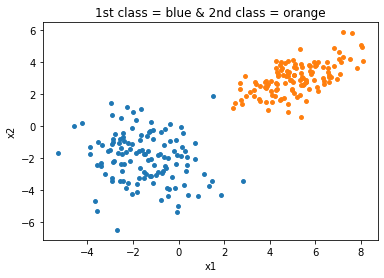

In [14]:
print("--------- CASE 2 ---------\n")
Display_Case_Result(0.8, 0.2)